# SVM - Training with sci-kit learn


Here is a test of Jupyter's Notebook based coding for Python! We will be using `SVM.svc()` by sci-kit learn to train our model.

I thought I would start using notebook based coding after seeing a friend use it. It also supports $\LaTeX$, a popular way to display math.

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import cross_val_score
import scipy as sp
import random

A key advantage of scipy, a superset of numpy, is that it allows for optimized and clean and vectorized code, similar to MATLAB. An example would be 

    a = np.arange(1, 10)
    b = np.arange(2, 11)
    c = a + b

Below, we will train the model and make a prediction a testing set. First, we will scale our data so it is between -1 and 1 and divided by the standard deviation.
  

In [2]:
X = sp.genfromtxt('mnist_train.txt', delimiter=',')
clf = svm.SVC(gamma=0.01, C= 40)
scale = preprocessing.MinMaxScaler(feature_range=(-1, 1))
clf.fit(scale.fit_transform(X[:, 1:]), X[:, 0])

T = sp.genfromtxt('mnist_test.txt', delimiter=',')
predicted = clf.predict(scale.transform(T[:, 1:]))

error = sp.mean(T[:, 0] != predicted)
print('Test predicted error is ', str(error))
print('Test predicted accuracy is ', str(1 - error))

scores = cross_val_score(clf, scale.transform(X[:, 1:]), X[:, 0], cv=5)
print('Cross val scores: ', scores)

Test predicted error is  0.057
Test predicted accuracy is  0.943
Cross val scores:  [ 0.94    0.935   0.94    0.9425  0.9375]


## Visualization

The Model has now been trained, and now it is time to view our results. The following code takes 15 random predictions and displays them in a coherent manner.

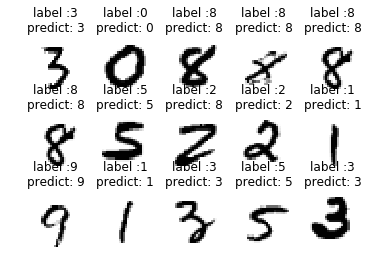

In [3]:
for index in range(15): # check 15 random predictions
    plt.subplot(3, 5, index+1)
    plt.axis('off')
    i = random.randint(0, sp.shape(T)[0])
    img = T[i, 1:].astype(sp.uint8).reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    r = T[i, 1:].reshape(1, -1)
    plt.title('label :%i' % T[i,0] + '\n' +
                'predict: %i' % clf.predict(scale.transform(r)))
plt.show()


# Conclusion

SVM's provide an accurate prediction to non-linear data with $<10000$ training examples. Outside of CNNs (Convolutional Neural Networks), SVMs provide a reasonable prediction of datasets without much training. Hopefully, this has been an informative lesson on the effectiveness of SVMs.